# TEST 0

In [1]:
from __future__ import absolute_import, division, print_function

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from config import *
from common import *
display.clear_output()

In [3]:
from affwild2_challenge.basic_emotion.losses1 import ccc, loss_ccc, ccc_numpy
from affwild2_challenge.basic_emotion.metrics import expr_score, f1_score, concordance_cc2

from affwild2_challenge.basic_emotion.dataset_affwild2 import AffWild2Dataset, emotiw_affwild2_mapping, affwild2_name, affwild2_emotiw_mapping, emotiw_name
from affwild2_challenge.basic_emotion.dataload_expr_va_image import VAExprImageBalancedDataLoader
from affwild2_challenge.basic_emotion.datagen_expr_va  import VAExprDataGenerator

from affwild2_challenge.basic_emotion.dataaug  import train_aug, valid_aug
from affwild2_challenge.basic_emotion.dataaug  import vggface2_preprocessing_input, vggface2_postprocessing_input

## 1. Setup Environments

In [4]:
params = {}
params["results_dir"] = os.path.join(sub_dir, "results", "t1")
params["db_file"] = os.path.join(dataset_dir, "AffWild2/data/affwild2_cropped_aligned_frames.h5")
params["db_root"] = os.path.join(dataset_dir, "AffWild2/data/cropped_aligned")
params["batch_size"] = 128
params["gpus"] = ["-1"]
params["weights_path"] = os.path.join(sub_dir, "weights", "t1_affwild2_new_expr_va_image_vggface2_weights_200216013106_epoch-78_loss-1.30_class-0.45_0.38_0.25_reg-0.01_0.02_0.06.h5")

params["debug"] = False
params["run_train"] = False
params["run_valid"] = False
params["run_test"] = False
params["run_test_va"] = False

params["use_parallel_model"] = True
params["val_train"] = True
params["val_valid"] = True
params["max_queue_size"] = 22
params["workers"] = 16
params["use_multiprocessing"] = False


print("parameters: ")
for key in params.keys(): print("+ %s: %s"%(key,params[key]))

if os.path.exists(params["results_dir"]) == False: os.makedirs(params["results_dir"])

parameters: 
+ results_dir: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/results/t1
+ db_file: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/affwild2_cropped_aligned_frames.h5
+ db_root: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/cropped_aligned
+ batch_size: 128
+ gpus: ['-1']
+ weights_path: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/weights/t1_affwild2_new_expr_va_image_vggface2_weights_200216013106_epoch-78_loss-1.30_class-0.45_0.38_0.25_reg-0.01_0.02_0.06.h5
+ debug: False
+ run_train: False
+ run_valid: False
+ run_test: False
+ run_test_va: False
+ use_parallel_model: True
+ val_train: True
+ val_valid: True
+ max_queue_size: 22
+ workers: 16
+ use_multiprocessing: False


In [5]:
# Choose gpus, init session
choose_keras_environment(gpus = params["gpus"], keras_backend = "tensorflow", verbose = 1)
init_session()
check_tensorflow_environment()

Environment GPUs:
+ Choose GPUs:  -1
+ Keras backend:  tensorflow


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

TensorFlow Version: 1.15.0
No GPU found. Please use a GPU to train your neural network.


## 2. Setup Data

In [6]:
# Dataset Configuration
dataset_info  = dict(db_file = params["db_file"], db_root = params["db_root"])
print("dataset_info: ")
for key in dataset_info.keys(): print("+ %s: %s"%(key,dataset_info[key]))
    
ds = AffWild2Dataset(**dataset_info)
ds.load_scheme_emotion_va()

dataset_info: 
+ db_file: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/affwild2_cropped_aligned_frames.h5
+ db_root: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/cropped_aligned
Loading Scheme Emotion VA: 
 + Loading train: 194
 + Loading valid: 57
 + Loading test: 223
 + Loading va_test: 139


Number of images:	720365
Distribution:  {'Neutral': 449660, 'Angry': 18688, 'Disgust': 7034, 'Fear': 9899, 'Happy': 115523, 'Sad': 86583, 'Surprise': 32978}


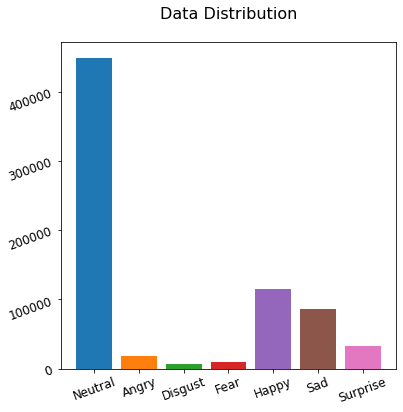

Number of images:	254674
Distribution:  {'Neutral': 156207, 'Angry': 6736, 'Disgust': 986, 'Fear': 8197, 'Happy': 36120, 'Sad': 30537, 'Surprise': 15891}


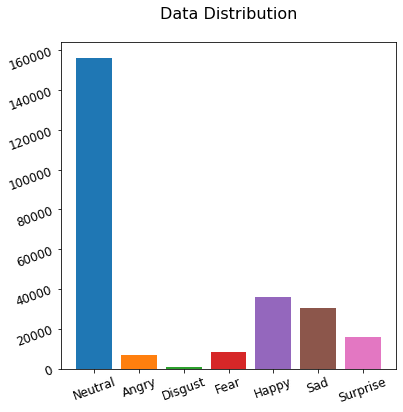

Number of images:	997332
Distribution:  {'Test': 997332}


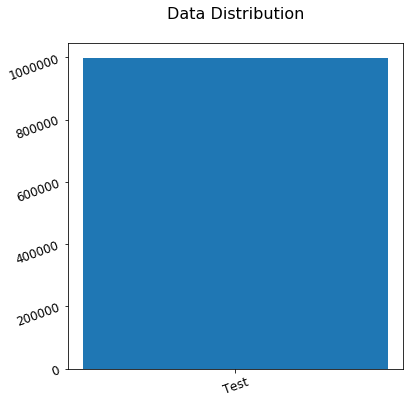

In [7]:
ds.view_emotion_summary(ds.a_idx_train, figsize=(6,6))
ds.view_emotion_summary(ds.a_idx_valid, figsize=(6,6))
ds.view_emotion_summary(ds.a_idx_test, figsize=(6,6));

Number of images:	720365
--------------------
Process va_valence: 
[0.148 0.148 0.148 ... 0.89  0.874 0.874]
Invalid distribution: Empty


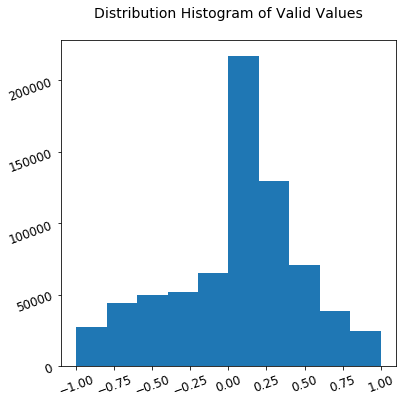

--------------------
Process va_arousal: 
[0.352 0.36  0.362 ... 0.874 0.874 0.874]
Invalid distribution: Empty


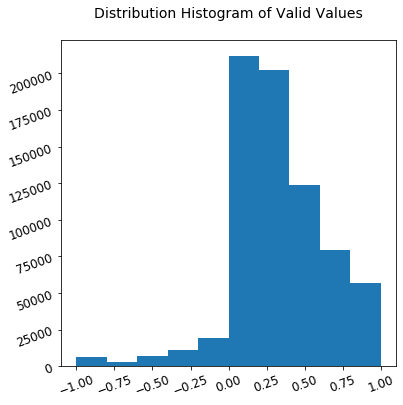

Number of images:	254674
--------------------
Process va_valence: 
[-1.    -1.    -1.    ... -0.681 -0.701 -0.703]
Invalid distribution: Empty


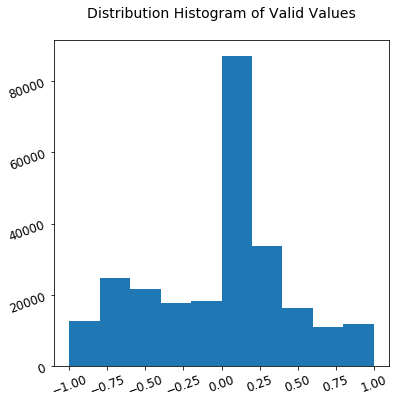

--------------------
Process va_arousal: 
[0.748 0.748 0.748 ... 0.599 0.608 0.634]
Invalid distribution: Empty


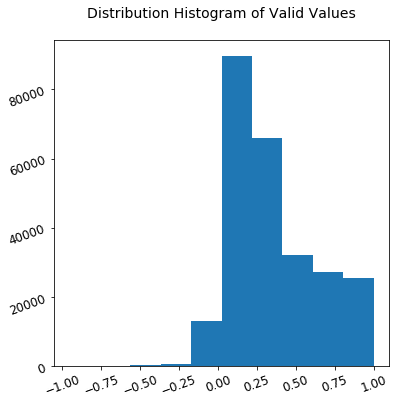

Number of images:	714986
--------------------
Process va_valence: 
[-2. -2. -2. ... -2. -2. -2.]
Invalid distribution:  {'Test': 714986}
Valid distribution: Empty
--------------------
Process va_arousal: 
[-2. -2. -2. ... -2. -2. -2.]
Invalid distribution:  {'Test': 714986}
Valid distribution: Empty


In [8]:
ds.view_va_summary(ds.a_idx_train, figsize=(6,6))
ds.view_va_summary(ds.a_idx_valid, figsize=(6,6))
ds.view_va_summary(ds.a_idx_va_test, figsize=(6,6))

In [9]:
train_loader = VAExprImageBalancedDataLoader(ds.a_idx_train, ds, 
                                    n_classes = 7,
                                    transforms= valid_aug(224),
                                    mode = "train", 
                                    has_balance=False, 
                                    balanced_mode = "", 
                                    capacity = 0,  
                                    preprocessing_image_fn = None)

valid_loader = VAExprImageBalancedDataLoader(ds.a_idx_valid, ds, 
                                    n_classes = 7,
                                    transforms= valid_aug(224),
                                    mode = "valid", 
                                    has_balance=False, 
                                    balanced_mode = "", 
                                    capacity = 0,  
                                    preprocessing_image_fn = None)

test_loader = VAExprImageBalancedDataLoader(ds.a_idx_test, ds, 
                                    n_classes = 7,
                                    transforms= valid_aug(224),
                                    mode = "test", 
                                    has_balance=False, 
                                    balanced_mode = "", 
                                    capacity = 0,  
                                    preprocessing_image_fn = None)

test_va_loader = VAExprImageBalancedDataLoader(ds.a_idx_va_test, ds, 
                                    n_classes = 7,
                                    transforms= valid_aug(224),
                                    mode = "test", 
                                    has_balance=False, 
                                    balanced_mode = "", 
                                    capacity = 0,  
                                    preprocessing_image_fn = None)

Training


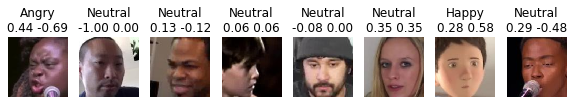

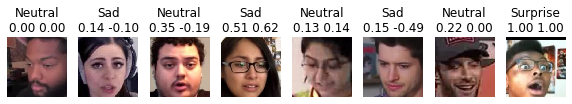

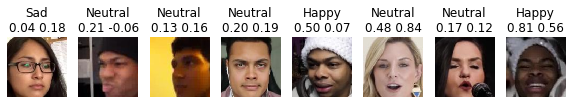

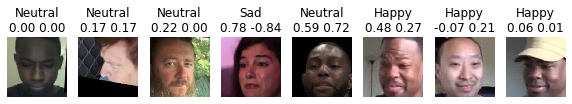

Validating


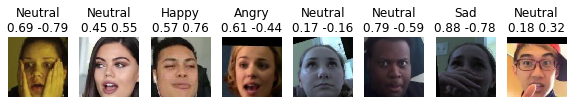

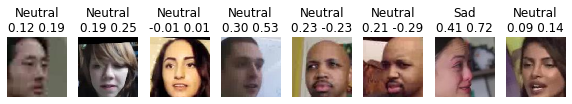

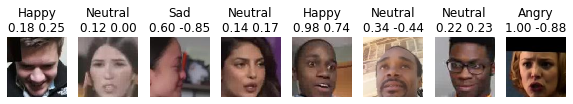

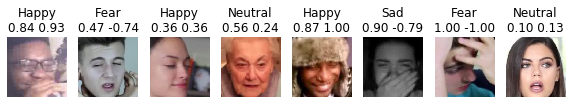

Testing


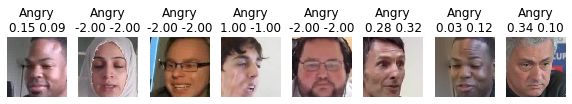

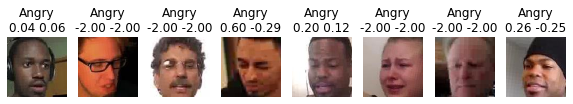

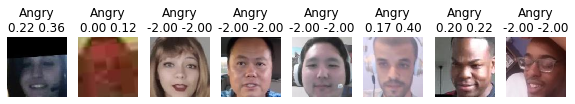

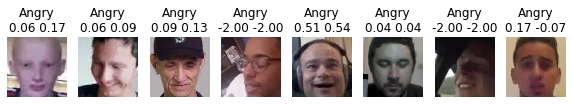

Testing VA


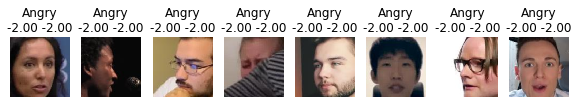

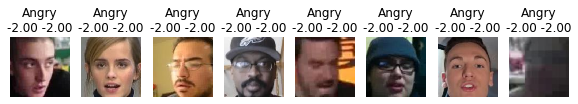

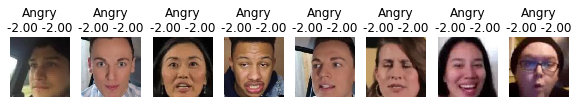

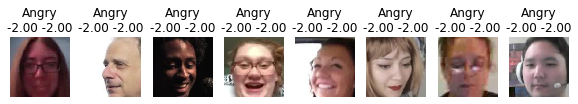

In [10]:
print("Training")
train_loader.view_images()
print("Validating")
valid_loader.view_images()
print("Testing")
test_loader.view_images()
print("Testing VA")
test_va_loader.view_images()

In [11]:
train_gen = VAExprDataGenerator(dataloader = train_loader, 
                                preprocessing_image_fn = vggface2_preprocessing_input,
                                batch_size = params["batch_size"], 
                                shuffle = False, seed = None )
print("Train: ")
x, y = next(train_gen)
print(x.shape, np.min(x), np.max(x))
print(y[0].shape, y[1].shape, y[2].shape)

valid_gen = VAExprDataGenerator(dataloader = valid_loader, 
                                preprocessing_image_fn = vggface2_preprocessing_input,
                                batch_size = params["batch_size"], 
                                shuffle = False, seed = None )
print("Valid: ")
x, y = next(valid_gen)
print(x.shape, np.min(x), np.max(x))
print(y[0].shape, y[1].shape, y[2].shape)

test_gen = VAExprDataGenerator(dataloader = test_loader, 
                                preprocessing_image_fn = vggface2_preprocessing_input,
                                batch_size = params["batch_size"], 
                                shuffle = False, seed = None )
print("Test: ")
x, y = next(test_gen)
print(x.shape, y)

test_va_gen = VAExprDataGenerator(dataloader = test_va_loader, 
                                preprocessing_image_fn = vggface2_preprocessing_input,
                                batch_size = params["batch_size"], 
                                shuffle = False, seed = None )
print("Test: ")
x, y = next(test_va_gen)
print(x.shape, y)

Train: 
(128, 224, 224, 3) -115.0912 163.5047
(128, 7) (128, 1) (128, 1)
Valid: 
(128, 224, 224, 3) -131.0912 85.5047
(128, 7) (128, 1) (128, 1)
Test: 
(128, 224, 224, 3) None
Test: 
(128, 224, 224, 3) None


## 3. Setup Model

In [ ]:
if params["run_train"]==True or params["run_valid"]==True or params["run_test"]==True or params["run_test_va"] == True:
    # Load Model
    K.clear_session()
    model = load_model(params["weights_path"], custom_objects={"loss_ccc": loss_ccc, 
                                                               "ccc": ccc, 
                                                               "f1_score": f1_score, 
                                                               "expr_score": expr_score})
    # Model Summary
    model.summary()
    
    if params["use_parallel_model"] == True:
        model = multi_gpu_model(model, gpus = len(params["gpus"]))
    # if
# if

## 4. Predict

### 4.1. Train

In [13]:
if params["run_train"] == True:
    train_gen.reset()

    if params["debug"] == True:
        steps = 50
        y_pred = model.predict(train_gen, verbose = 1, steps = steps)
    else:
        y_pred = model.predict(train_gen, verbose = 1)
    # if
# if

In [14]:
if params["run_train"] == True:
    y_results = {}
    y_results["emotion"]    = y_pred[0]
    y_results["aro_ccc"]    = y_pred[1]
    y_results["val_ccc"]    = y_pred[2]
    y_results["valaro_mse"] = y_pred[3]

    save_path = os.path.join(params["results_dir"], "train.npz")
    print(f"Save Train: {save_path}")
    np.savez(save_path, **y_results)
# if

### 4.2. Valid

In [15]:
if params["run_valid"] == True:
    valid_gen.reset()

    if params["debug"] == True:
        steps = 50
        y_pred = model.predict(valid_gen, verbose = 1, steps = steps)
    else:
        y_pred = model.predict(valid_gen, verbose = 1)
    # if
# if

In [16]:
if params["run_valid"] == True:
    y_results = {}
    y_results["emotion"]    = y_pred[0]
    y_results["aro_ccc"]    = y_pred[1]
    y_results["val_ccc"]    = y_pred[2]
    y_results["valaro_mse"] = y_pred[3]

    save_path = os.path.join(params["results_dir"], "valid.npz")
    print(f"Save Valid: {save_path}")
    np.savez(save_path, **y_results)
# if

### 4.3. Test

In [17]:
if params["run_test"] == True:    
    test_gen.reset()

    if params["debug"] == True:
        steps = 50
        y_pred = model.predict(test_gen, verbose = 1, steps = steps)
    else:
        y_pred = model.predict(test_gen, verbose = 1)
# if

In [18]:
if params["run_test"] == True:    
    y_results = {}
    y_results["emotion"]    = y_pred[0]
    y_results["aro_ccc"]    = y_pred[1]
    y_results["val_ccc"]    = y_pred[2]
    y_results["valaro_mse"] = y_pred[3]

    save_path = os.path.join(params["results_dir"], "test.npz")
    print(f"Save Test: {save_path}")
    np.savez(save_path, **y_results)
# if

### 4.4. Test VA

In [19]:
if params["run_test_va"] == True:    
    test_va_gen.reset()

    if params["debug"] == True:
        steps = 50
        y_pred = model.predict(test_va_gen, verbose = 1, steps = steps)
    else:
        y_pred = model.predict(test_va_gen, verbose = 1)
# if

In [20]:
if params["run_test_va"] == True:    
    y_results = {}
    y_results["emotion"]    = y_pred[0]
    y_results["aro_ccc"]    = y_pred[1]
    y_results["val_ccc"]    = y_pred[2]
    y_results["valaro_mse"] = y_pred[3]

    save_path = os.path.join(params["results_dir"], "test_va.npz")
    print(f"Save Test: {save_path}")
    np.savez(save_path, **y_results)
# if

## 5. Evaluation

### 5.1. Train

Classification Report: 
               precision    recall  f1-score   support

     Neutral       0.91      0.34      0.49    449660
       Angry       0.24      0.76      0.36     18688
     Disgust       0.19      0.73      0.30      7034
        Fear       0.17      0.82      0.28      9899
       Happy       0.41      0.65      0.51    115523
         Sad       0.58      0.80      0.68     86583
    Surprise       0.19      0.66      0.29     32978

    accuracy                           0.48    720365
   macro avg       0.38      0.68      0.42    720365
weighted avg       0.72      0.48      0.50    720365

Confustion Matrix Int: 
 [[151557  35742  15722  23943 101463  44374  76859]
 [   845  14145    669    972    795    541    721]
 [   148    654   5114    429    167     91    431]
 [   282    179    316   8143     96    273    610]
 [ 10651   4668   3228   3833  75320   3748  14075]
 [  1817   1713   1105   8024   1985  69517   2422]
 [  2074   2228    639   3073   2692    5

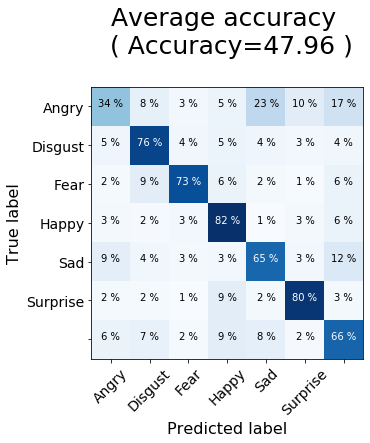

In [21]:
if params["val_train"] == True:   
    
    load_path  = os.path.join(params["results_dir"], f"train.npz")
    a_idx_data = ds.a_idx_train

    y_results = dict(np.load(load_path, allow_pickle=True))
    
    y_pred_emotion_label = emotiw_affwild2_mapping[np.argmax(y_results["emotion"], axis = 1)]
    y_true_emotion_label = ds.df_frames.loc[a_idx_data]["expr_emotion"].values
    
    a_summary_report = model_report(y_true_emotion_label, y_pred_emotion_label, affwild2_name)
    s_summary_report = buffer_print_string(print_summary, a_summary_report)
    print(s_summary_report)
    
    f1   = a_summary_report["model_f1_avg_weighted"]
    acc  = a_summary_report["model_acc_all"]
    expr = f1 * 0.66 + acc * 0.33
    print(f"f1: {f1}")
    print(f"acc: {acc}")
    print(f"expr: {expr}")
    
    plt.figure(figsize=(6,6))
    plot_confusion_matrix(y_true_emotion_label, y_pred_emotion_label, 
                          title='Average accuracy \n ( Accuracy={acc:.2f} )\n',
                          classes = affwild2_name)
    
    aro_pred = y_results["aro_ccc"].flatten()
    val_pred = y_results["val_ccc"].flatten()
    aro_true = ds.df_frames.loc[a_idx_data]["va_arousal"].values
    val_true = ds.df_frames.loc[a_idx_data]["va_valence"].values

    aro_ccc1 = concordance_cc2(aro_true, aro_pred)
    aro_ccc2 = ccc_numpy(aro_true, aro_pred)
    val_ccc1 = concordance_cc2(val_true, val_pred)
    val_ccc2 = ccc_numpy(val_true, val_pred)

    avg_ccc1 = (aro_ccc1 + val_ccc1) / 2.0
    avg_ccc2 = (aro_ccc2 + val_ccc2) / 2.0

    print(f"aro: {aro_ccc1}, {aro_ccc2}")
    print(f"val: {val_ccc1}, {val_ccc2}")
    print(f"valaro_avg: {avg_ccc1}, {avg_ccc2}")
# if

## 5.2. Valid

Classification Report: 
               precision    recall  f1-score   support

     Neutral       0.79      0.23      0.35    156207
       Angry       0.10      0.36      0.15      6736
     Disgust       0.04      0.21      0.07       986
        Fear       0.12      0.28      0.17      8197
       Happy       0.43      0.69      0.53     36120
         Sad       0.39      0.55      0.45     30537
    Surprise       0.17      0.62      0.27     15891

    accuracy                           0.36    254674
   macro avg       0.29      0.42      0.28    254674
weighted avg       0.61      0.36      0.37    254674

Confustion Matrix Int: 
 [[35525 19309  2453 11148 28650 19539 39583]
 [  452  2422   293   716   776  1173   904]
 [   24   165   209    49   164   302    73]
 [  904   796  1010  2325   221  1892  1049]
 [ 2745   614   302   501 24987  2429  4542]
 [ 4508   743   680  3649  2168 16771  2018]
 [  939   771   307  1074  1603  1330  9867]]

Confustion Matrix Norm: 
 [[22.74 12

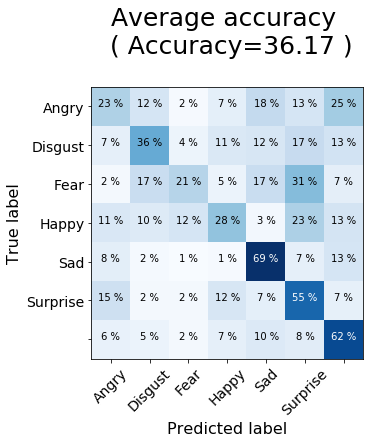

In [22]:
if params["val_valid"] == True:   
    load_path  = os.path.join(params["results_dir"], f"valid.npz")
    a_idx_data = ds.a_idx_valid

    y_results = dict(np.load(load_path, allow_pickle=True))
    
    y_pred_emotion_label = emotiw_affwild2_mapping[np.argmax(y_results["emotion"], axis = 1)]
    y_true_emotion_label = ds.df_frames.loc[a_idx_data]["expr_emotion"].values
    
    a_summary_report = model_report(y_true_emotion_label, y_pred_emotion_label, affwild2_name)
    s_summary_report = buffer_print_string(print_summary, a_summary_report)
    print(s_summary_report)
    
    f1   = a_summary_report["model_f1_avg_weighted"]
    acc  = a_summary_report["model_acc_all"]
    expr = f1 * 0.66 + acc * 0.33
    print(f"f1: {f1}")
    print(f"acc: {acc}")
    print(f"expr: {expr}")
    
    plt.figure(figsize=(6,6))
    plot_confusion_matrix(y_true_emotion_label, y_pred_emotion_label, 
                          title='Average accuracy \n ( Accuracy={acc:.2f} )\n',
                          classes = affwild2_name)
    
    aro_pred = y_results["aro_ccc"].flatten()
    val_pred = y_results["val_ccc"].flatten()
    aro_true = ds.df_frames.loc[a_idx_data]["va_arousal"].values
    val_true = ds.df_frames.loc[a_idx_data]["va_valence"].values

    aro_ccc1 = concordance_cc2(aro_true, aro_pred)
    aro_ccc2 = ccc_numpy(aro_true, aro_pred)
    val_ccc1 = concordance_cc2(val_true, val_pred)
    val_ccc2 = ccc_numpy(val_true, val_pred)

    avg_ccc1 = (aro_ccc1 + val_ccc1) / 2.0
    avg_ccc2 = (aro_ccc2 + val_ccc2) / 2.0

    print(f"aro: {aro_ccc1}, {aro_ccc2}")
    print(f"val: {val_ccc1}, {val_ccc2}")
    print(f"valaro_avg: {avg_ccc1}, {avg_ccc2}")
# if